# Data cleaning

In [1]:
import polars as pl
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score 

dataPath = "/kaggle/input/home-credit-credit-risk-model-stability/"

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
feature_def = pl.read_csv(dataPath + 'feature_definitions.csv').to_pandas()
feature_def

Variable  \
0                     actualdpd_943P   
1            actualdpdtolerance_344P   
2               addres_district_368M   
3                   addres_role_871L   
4                    addres_zip_823M   
5                       amount_1115A   
6                        amount_416A   
7                    amount_4527230A   
8                    amount_4917619A   
9          amtdebitincoming_4809443A   
10         amtdebitoutgoing_4809440A   
11        amtdepositbalance_4809441A   
12       amtdepositincoming_4809444A   
13       amtdepositoutgoing_4809442A   
14    amtinstpaidbefduel24m_4187115A   
15          annualeffectiverate_199L   
16           annualeffectiverate_63L   
17                      annuity_780A   
18                      annuity_853A   
19              annuitynextmonth_57A   
20               applicationcnt_361L   
21              applications30d_658L   
22             applicationscnt_1086L   
23              applicationscnt_464L   
24              applicationscnt_629L   
25              applicationscnt_867L   
26                 approvaldate_319D   
27               assignmentdate_238D   
28           assignmentdate_4527235D   
29           assignmentdate_4955616D   
30         avgdbddpdlast24m_3658932P   
31          avgdbddpdlast3m_4187120P   
32         avgdbdtollast24m_4525197P   
33       avgdpdtolclosure24_3658938P   
34         avginstallast24m_3658937A   
35         avglnamtstart24m_4525187A   
36          avgmaxdpdlast9m_3716943P   
37    avgoutstandbalancel6m_4187114A   
38            avgpmtlast12m_4525200A   
39                  bankacctype_710L   
40                        birth_259D   
41                    birthdate_574D   
42                     birthdate_87D   
43          byoccupationinc_3656910L   
44            cacccardblochreas_147M   
45             cancelreason_3545846M   
46                      cardtype_51L   
47                     childnum_185L   
48                      childnum_21L   
49       classificationofcontr_1114M   
50         classificationofcontr_13M   
51        classificationofcontr_400M   
52                   clientscnt_100L   
53                  clientscnt_1022L   
54                  clientscnt_1071L   
55                  clientscnt_1130L   
56                   clientscnt_136L   
57                   clientscnt_157L   
58                   clientscnt_257L   
59                   clientscnt_304L   
60                   clientscnt_360L   
61                   clientscnt_493L   
62                   clientscnt_533L   
63                   clientscnt_887L   
64                   clientscnt_946L   
65            clientscnt12m_3712952L   
66             clientscnt3m_3712950L   
67             clientscnt6m_3712949L   
68          cntincpaycont9m_3716944L   
69                cntpmts24_3658933L   
70   collater_typofvalofguarant_298M   
71   collater_typofvalofguarant_407M   
72   collater_valueofguarantee_1124L   
73    collater_valueofguarantee_876L   
74   collaterals_typeofguarante_359M   
75   collaterals_typeofguarante_669M   
76          commnoinclast6m_3546845L   
77             contaddr_district_15M   
78          contaddr_matchlist_1032L   
79          contaddr_smempladdr_334L   
80             contaddr_zipcode_807M   
81                 contractdate_551D   
82              contractenddate_991D   
83         contractmaturitydate_151D   
84             contractssum_5085716L   
85                   contractst_516M   
86                   contractst_545M   
87                   contractst_964M   
88              contractsum_5085717L   
89                 contracttype_653M   
90                    conts_role_79M   
91                   conts_type_509L   
92                 creationdate_885D   
93        credacc_actualbalance_314A   
94          credacc_cards_status_52L   
95              credacc_credlmt_575A   
96            credacc_maxhisbal_375A   
97             credacc_minhisbal_90A   
98               credacc_status_367L   
99         credacc_transacti

## train_credit_bureau_a_1_X

In [3]:
def prcess_train_credit_bureau_a_1_X(id):
    df = pl.read_csv(dataPath + f"csv_files/train/train_credit_bureau_a_1_{id}.csv")
    df = df.sort(['case_id', 'num_group1'])

    agg_df = df.group_by('case_id').agg(
        classificationofcontr_13M=pl.col('classificationofcontr_13M').first(),
        classificationofcontr_400M=pl.col('classificationofcontr_400M').first(),
        contractst_545M=pl.col('contractst_545M').first(),
        contractst_964M=pl.col('contractst_964M').first(),
        credlmt_935A=pl.col('credlmt_935A').max(),
        dateofcredend_289D=pl.col('dateofcredend_289D').first(),
        dateofcredstart_739D=pl.col('dateofcredstart_739D').first(),
        debtoutstand_525A=pl.col('debtoutstand_525A').max(),
        debtoverdue_47A=pl.col('debtoverdue_47A').max(),
        dpdmax_139P=pl.col('dpdmax_139P').max(),
        financialinstitution_382M=pl.col('financialinstitution_382M').first(),
        financialinstitution_591M=pl.col('financialinstitution_591M').first(),
        instlamount_768A=pl.col('instlamount_768A').max(),
        lastupdate_1112D=pl.col('lastupdate_1112D').max(),
        monthlyinstlamount_332A=pl.col('monthlyinstlamount_332A').first(),
        nominalrate_281L=pl.col('nominalrate_281L').first(),
        numberofcontrsvalue_258L=pl.col('numberofcontrsvalue_258L').max(),
        numberofcontrsvalue_358L=pl.col('numberofcontrsvalue_358L').max(),
        numberofinstls_320L=pl.col('numberofinstls_320L').max(),
        numberofoutstandinstls_59L=pl.col('numberofoutstandinstls_59L').max(),
        numberofoverdueinstlmax_1039L=pl.col('numberofoverdueinstlmax_1039L').max(),
        numberofoverdueinstls_725L=pl.col('numberofoverdueinstls_725L').max(),
        outstandingamount_362A=pl.col('outstandingamount_362A').max(),
        overdueamount_659A=pl.col('overdueamount_659A').max(),
        overdueamountmax2_14A=pl.col('overdueamountmax2_14A').max(),
        overdueamountmax2_398A=pl.col('overdueamountmax2_398A').max(),
        overdueamountmax2date_1002D=pl.col('overdueamountmax2date_1002D').first(),
        overdueamountmax2date_1142D=pl.col('overdueamountmax2date_1142D').first(),
        overdueamountmax_155A=pl.col('overdueamountmax_155A').max(),
        overdueamountmax_35A=pl.col('overdueamountmax_35A').max(),
        overdueamountmaxdatemonth_284T=pl.col('overdueamountmaxdatemonth_284T').max(),
        overdueamountmaxdatemonth_365T=pl.col('overdueamountmaxdatemonth_365T').max(),
        overdueamountmaxdateyear_2T=pl.col('overdueamountmaxdateyear_2T').max(),
        overdueamountmaxdateyear_994T=pl.col('overdueamountmaxdateyear_994T').max(),
        purposeofcred_426M=pl.col('purposeofcred_426M').first(),
        purposeofcred_874M=pl.col('purposeofcred_874M').first(),
        residualamount_856A=pl.col('residualamount_856A').max(),
        subjectrole_182M=pl.col('subjectrole_182M').first(),
        subjectrole_93M=pl.col('subjectrole_93M').first(),
        totalamount_996A=pl.col('totalamount_996A').max(),
        totaldebtoverduevalue_178A=pl.col('totaldebtoverduevalue_178A').max(),
        totaldebtoverduevalue_718A=pl.col('totaldebtoverduevalue_718A').max(),
        totaloutstanddebtvalue_39A=pl.col('totaloutstanddebtvalue_39A').max()
    )
    
    return agg_df

In [4]:
# process all data (train_credit_bureau_a_1_0, train_credit_bureau_a_1_1, train_credit_bureau_a_1_2, train_credit_bureau_a_1_3)

processed_dfs = []
for i in range (4):
    df = prcess_train_credit_bureau_a_1_X(i)
    processed_dfs.append(df)

In [5]:
_train_credit_bureau_a_1 = pl.concat(processed_dfs, how="vertical_relaxed",)
_train_credit_bureau_a_1

shape: (1_386_273, 44)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ case_id ┆ classifica ┆ classific ┆ contracts ┆ … ┆ totalamou ┆ totaldebt ┆ totaldebt ┆ totalouts │
│ ---     ┆ tionofcont ┆ ationofco ┆ t_545M    ┆   ┆ nt_996A   ┆ overdueva ┆ overdueva ┆ tanddebtv │
│ i64     ┆ r_13M      ┆ ntr_400M  ┆ ---       ┆   ┆ ---       ┆ lue_178A  ┆ lue_718A  ┆ alue_39A  │
│         ┆ ---        ┆ ---       ┆ str       ┆   ┆ f64       ┆ ---       ┆ ---       ┆ ---       │
│         ┆ str        ┆ str       ┆           ┆   ┆           ┆ f64       ┆ f64       ┆ f64       │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 388     ┆ 4408ff0f   ┆ a55475b1  ┆ 7241344e  ┆ … ┆ 268897.62 ┆ 0.0       ┆ 0.0       ┆ 374419.5  │
│ 405     ┆ ea6782cc   ┆ a55475b1  ┆ 7241344e  ┆ … ┆ 256000.0  ┆ 0.0       ┆ null      ┆ 224467.5  │
│ 409     ┆ ea6782cc   ┆ a55475b1  ┆ 7241344e  ┆ … ┆ 150000.0  ┆ 0.0       ┆ 0.0       ┆ 52079.754 │
│ 410     ┆ ea6782cc   ┆ a55475b1  ┆ 7241344e  ┆ … ┆ null      ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 411     ┆ ea6782cc   ┆ a55475b1  ┆ 7241344e  ┆ … ┆ 100000.0  ┆ 0.0       ┆ 0.0       ┆ 347346.88 │
│ …       ┆ …          ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 2703450 ┆ ea6782cc   ┆ 9158339f  ┆ 7241344e  ┆ … ┆ 60602.0   ┆ 0.0       ┆ 0.0       ┆ 10572.718 │
│ 2703451 ┆ ea6782cc   ┆ ea6782cc  ┆ 7241344e  ┆ … ┆ 113980.0  ┆ 0.0       ┆ 0.0       ┆ 64921.707 │
│ 2703452 ┆ ea6782cc   ┆ ea6782cc  ┆ 7241344e  ┆ … ┆ null      ┆ 0.0       ┆ 0.0       ┆ 20547.752 │
│ 2703453 ┆ ea6782cc   ┆ 62332675  ┆ 7241344e  ┆ … ┆ 51996.0   ┆ 0.0       ┆ 0.0       ┆ 42536.66  │
│ 2703454 ┆ ea6782cc   ┆ e2453741  ┆ 7241344e  ┆ … ┆ 15998.0   ┆ 0.0       ┆ 0.0       ┆ 8551.578  │
└─────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

## train_credit_bureau_a_2_X

In [6]:
def prcess_train_credit_bureau_a_2_X(id):
    df = pl.read_csv(dataPath + f"csv_files/train/train_credit_bureau_a_2_{id}.csv")
    df = df.sort(['case_id', 'num_group1', 'num_group2'])
    
    agg_df = df.group_by('case_id').agg(
        collater_valueofguarantee_1124L=pl.col('collater_valueofguarantee_1124L').max(),
        pmts_dpd_1073P=pl.col('pmts_dpd_1073P').sum(),
        pmts_overdue_1140A=pl.col('pmts_overdue_1140A').sum(),
        min_pmts_year_1139T=pl.col('pmts_year_1139T').min(),
        max_pmts_year_1139T=pl.col('pmts_year_1139T').max(),
        num_of_contracts=pl.col('num_group1').max(),
        collater_typofvalofguarant_298M=pl.col('collater_typofvalofguarant_298M').first(),
        collaterals_typeofguarante_669M=pl.col('collaterals_typeofguarante_669M').first(),
        subjectroles_name_838M=pl.col('subjectroles_name_838M').first()
    )
    
    return agg_df

In [7]:
# process all data (from train_credit_bureau_a_2_0 to train_credit_bureau_a_2_10

processed_dfs = []
for i in range (11):
    df = prcess_train_credit_bureau_a_2_X(i)
    processed_dfs.append(df)

In [8]:
_train_credit_bureau_a_2 = pl.concat(processed_dfs, how="vertical_relaxed",)
_train_credit_bureau_a_2

shape: (1_385_288, 10)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ case_id ┆ collater_v ┆ pmts_dpd_ ┆ pmts_over ┆ … ┆ num_of_co ┆ collater_ ┆ collatera ┆ subjectro │
│ ---     ┆ alueofguar ┆ 1073P     ┆ due_1140A ┆   ┆ ntracts   ┆ typofvalo ┆ ls_typeof ┆ les_name_ │
│ i64     ┆ antee_1124 ┆ ---       ┆ ---       ┆   ┆ ---       ┆ fguarant_ ┆ guarante_ ┆ 838M      │
│         ┆ L          ┆ str       ┆ str       ┆   ┆ i64       ┆ 298M      ┆ 669M      ┆ ---       │
│         ┆ ---        ┆           ┆           ┆   ┆           ┆ ---       ┆ ---       ┆ str       │
│         ┆ str        ┆           ┆           ┆   ┆           ┆ str       ┆ str       ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 388     ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ … ┆ 1         ┆ 8fd95e4b  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 405     ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ … ┆ 1         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 409     ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ … ┆ 2         ┆ 8fd95e4b  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 410     ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ … ┆ 0         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 411     ┆ 0.0        ┆ 13.0      ┆ 3.3740003 ┆ … ┆ 3         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ …       ┆ …          ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 2703450 ┆ 0.0        ┆ null      ┆ null      ┆ … ┆ 10        ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 2703451 ┆ 0.0        ┆ null      ┆ null      ┆ … ┆ 3         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 2703452 ┆ 0.0        ┆ null      ┆ null      ┆ … ┆ 2         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 2703453 ┆ 0.0        ┆ null      ┆ null      ┆ … ┆ 12        ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 2703454 ┆ 0.0        ┆ null      ┆ null      ┆ … ┆ 8         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
└─────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

## train_debitcard_1

In [9]:
df = pl.read_csv(dataPath + 'csv_files/train/train_debitcard_1.csv')

_train_debitcard_1 = df.group_by('case_id').agg(
    num_of_debit_cards_opened=pl.col('openingdate_857D').count(),
    first_opening_date=pl.col('openingdate_857D').min(),
    last_opening_date=pl.col('openingdate_857D').max()
)

In [10]:
_train_debitcard_1

shape: (111_772, 4)
┌─────────┬───────────────────────────┬────────────────────┬───────────────────┐
│ case_id ┆ num_of_debit_cards_opened ┆ first_opening_date ┆ last_opening_date │
│ ---     ┆ ---                       ┆ ---                ┆ ---               │
│ i64     ┆ u32                       ┆ str                ┆ str               │
╞═════════╪═══════════════════════════╪════════════════════╪═══════════════════╡
│ 1779456 ┆ 1                         ┆ 2014-05-18         ┆ 2014-05-18        │
│ 2654847 ┆ 2                         ┆ 2013-12-17         ┆ 2015-12-16        │
│ 1251169 ┆ 2                         ┆ 2013-09-09         ┆ 2014-08-26        │
│ 1720163 ┆ 3                         ┆ 2014-07-18         ┆ 2015-10-07        │
│ 171215  ┆ 1                         ┆ 2016-06-17         ┆ 2016-06-17        │
│ …       ┆ …                         ┆ …                  ┆ …                 │
│ 1393629 ┆ 1                         ┆ 2016-09-27         ┆ 2016-09-27        │
│ 1418227 ┆ 1                         ┆ 2014-03-13         ┆ 2014-03-13        │
│ 1444341 ┆ 2                         ┆ 2013-12-19         ┆ 2015-07-29        │
│ 233755  ┆ 1                         ┆ 2016-11-11         ┆ 2016-11-11        │
│ 223659  ┆ 1                         ┆ 2015-11-23         ┆ 2015-11-23        │
└─────────┴───────────────────────────┴────────────────────┴───────────────────┘

## train_deposit_1

In [11]:
df = pl.read_csv(dataPath + 'csv_files/train/train_deposit_1.csv')

_train_deposit_1 = df.group_by('case_id').agg(
    sum_amount_416A=pl.col('amount_416A').sum(),
    avg_amount_416A=pl.col('amount_416A').mean(),
    contractenddate_991D=pl.col('contractenddate_991D').max(),
    min_openingdate_313D=pl.col('openingdate_313D').min(),
    num_of_openingdate_313D=pl.col('num_group1').max()
)

In [12]:
_train_deposit_1

shape: (105_111, 6)
┌─────────┬─────────────────┬─────────────────┬─────────────────┬─────────────────┬────────────────┐
│ case_id ┆ sum_amount_416A ┆ avg_amount_416A ┆ contractenddate ┆ min_openingdate ┆ num_of_opening │
│ ---     ┆ ---             ┆ ---             ┆ _991D           ┆ _313D           ┆ date_313D      │
│ i64     ┆ f64             ┆ f64             ┆ ---             ┆ ---             ┆ ---            │
│         ┆                 ┆                 ┆ str             ┆ str             ┆ i64            │
╞═════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╪════════════════╡
│ 247806  ┆ 3456.918        ┆ 3456.918        ┆ null            ┆ 2016-04-13      ┆ 0              │
│ 1719169 ┆ 20856.164       ┆ 20856.164       ┆ null            ┆ 2017-04-05      ┆ 0              │
│ 1747388 ┆ 24310.9077      ┆ 8103.6359       ┆ null            ┆ 2015-06-01      ┆ 2              │
│ 1903320 ┆ 239.21399       ┆ 239.21399       ┆ 2017-10-24      ┆ 2014-10-25      ┆ 0              │
│ 1659394 ┆ 1351.524        ┆ 1351.524        ┆ 2017-08-18      ┆ 2014-08-19      ┆ 0              │
│ …       ┆ …               ┆ …               ┆ …               ┆ …               ┆ …              │
│ 2676449 ┆ 0.0             ┆ 0.0             ┆ null            ┆ 2014-10-15      ┆ 0              │
│ 1813697 ┆ 0.0             ┆ 0.0             ┆ null            ┆ 2015-11-27      ┆ 1              │
│ 2661363 ┆ 20872.158       ┆ 20872.158       ┆ null            ┆ 2017-03-29      ┆ 0              │
│ 1395737 ┆ 225.56201       ┆ 225.56201       ┆ 2018-06-26      ┆ 2016-06-24      ┆ 0              │
│ 1271265 ┆ 234.288         ┆ 117.144         ┆ 2017-07-20      ┆ 2014-07-21      ┆ 1              │
└─────────┴─────────────────┴─────────────────┴─────────────────┴─────────────────┴────────────────┘

## train_person_1

In [13]:
df = pl.read_csv(dataPath + 'csv_files/train/train_person_1.csv')
df = df.sort(['case_id', 'num_group1'])

_train_person_1 = df.group_by('case_id').agg(
    birth_259D=pl.col('birth_259D').first(),
    childnum_185L=pl.col('childnum_185L').max(),
    contaddr_district_15M=pl.col('contaddr_district_15M').first(),
    education_927M=pl.col('education_927M').first(),
    empl_employedfrom_271D=pl.col('empl_employedfrom_271D').first(),
    empl_industry_691L=pl.col('empl_industry_691L').first(),
    empladdr_district_926M=pl.col('empladdr_district_926M').first(),
    familystate_447L=pl.col('familystate_447L').first(),
    incometype_1044T=pl.col('incometype_1044T').first(),
    language1_981M=pl.col('language1_981M').first(),
    mainoccupationinc_384A=pl.col('mainoccupationinc_384A').max(),
    registaddr_district_1083M=pl.col('registaddr_district_1083M').first(),
    relationshiptoclient_415T=pl.col('relationshiptoclient_415T').first(),
    relationshiptoclient_642T=pl.col('relationshiptoclient_642T').first(),
    role_1084L=pl.col('role_1084L').first(),
    sex_738L=pl.col('sex_738L').first()
)
_train_person_1

shape: (1_526_659, 17)
┌─────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ case_id ┆ birth_259D ┆ childnum_1 ┆ contaddr_ ┆ … ┆ relations ┆ relations ┆ role_1084 ┆ sex_738L │
│ ---     ┆ ---        ┆ 85L        ┆ district_ ┆   ┆ hiptoclie ┆ hiptoclie ┆ L         ┆ ---      │
│ i64     ┆ str        ┆ ---        ┆ 15M       ┆   ┆ nt_415T   ┆ nt_642T   ┆ ---       ┆ str      │
│         ┆            ┆ f64        ┆ ---       ┆   ┆ ---       ┆ ---       ┆ str       ┆          │
│         ┆            ┆            ┆ str       ┆   ┆ str       ┆ str       ┆           ┆          │
╞═════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0       ┆ 1986-07-01 ┆ null       ┆ P88_18_84 ┆ … ┆ null      ┆ null      ┆ CL        ┆ F        │
│ 1       ┆ 1957-08-01 ┆ null       ┆ P103_93_9 ┆ … ┆ null      ┆ null      ┆ CL        ┆ M        │
│         ┆            ┆            ┆ 4         ┆   ┆           ┆           ┆           ┆          │
│ 2       ┆ 1974-12-01 ┆ null       ┆ P91_125_1 ┆ … ┆ null      ┆ null      ┆ EM        ┆ F        │
│         ┆            ┆            ┆ 84        ┆   ┆           ┆           ┆           ┆          │
│ 3       ┆ 1993-08-01 ┆ null       ┆ P155_139_ ┆ … ┆ null      ┆ null      ┆ CL        ┆ F        │
│         ┆            ┆            ┆ 77        ┆   ┆           ┆           ┆           ┆          │
│ 4       ┆ 1994-01-01 ┆ null       ┆ P194_82_1 ┆ … ┆ null      ┆ null      ┆ CL        ┆ F        │
│         ┆            ┆            ┆ 74        ┆   ┆           ┆           ┆           ┆          │
│ …       ┆ …          ┆ …          ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 2703450 ┆ 1960-01-01 ┆ null       ┆ P123_39_1 ┆ … ┆ null      ┆ null      ┆ CL        ┆ F        │
│         ┆            ┆            ┆ 70        ┆   ┆           ┆           ┆           ┆          │
│ 2703451 ┆ 1950-11-01 ┆ null       ┆ P162_18_1 ┆ … ┆ null      ┆ null      ┆ CL        ┆ F        │
│         ┆            ┆            ┆ 72        ┆   ┆           ┆           ┆           ┆          │
│ 2703452 ┆ 1977-08-01 ┆ null       ┆ P133_44_1 ┆ … ┆ null      ┆ null      ┆ CL        ┆ M        │
│         ┆            ┆            ┆ 67        ┆   ┆           ┆           ┆           ┆          │
│ 2703453 ┆ 1950-02-01 ┆ null       ┆ P123_6_84 ┆ … ┆ null      ┆ null      ┆ CL        ┆ F        │
│ 2703454 ┆ 1948-04-01 ┆ null       ┆ P48_127_1 ┆ … ┆ null      ┆ null      ┆ CL        ┆ F        │
│         ┆            ┆            ┆ 9         ┆   ┆           ┆           ┆           ┆          │
└─────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

## train_tax_registry_X_1

In [14]:
train_tax_registry_a_1 = pl.read_csv(dataPath + "csv_files/train/train_tax_registry_a_1.csv")
train_tax_registry_b_1 = pl.read_csv(dataPath + "csv_files/train/train_tax_registry_b_1.csv")
train_tax_registry_c_1 = pl.read_csv(dataPath + "csv_files/train/train_tax_registry_c_1.csv")

_train_tax_registry_a_1 = train_tax_registry_a_1.group_by('case_id').agg(
    max_recorddate_4527225D=pl.col('recorddate_4527225D').max(),
    sum_amount_4527230A=pl.col('amount_4527230A').sum()
)

_train_tax_registry_b_1 = train_tax_registry_b_1.group_by('case_id').agg(
    max_deductiondate_4917603D=pl.col('deductiondate_4917603D').max(),
    sum_amount_4917619A=pl.col('amount_4917619A').sum()
)

_train_tax_registry_c_1 = train_tax_registry_c_1.group_by('case_id').agg(
    max_processingdate_168D=pl.col('processingdate_168D').max(),
    sum_pmtamount_36A=pl.col('pmtamount_36A').sum()
)

In [15]:
_train_tax_registry_a_1

shape: (457_934, 3)
┌─────────┬─────────────────────────┬─────────────────────┐
│ case_id ┆ max_recorddate_4527225D ┆ sum_amount_4527230A │
│ ---     ┆ ---                     ┆ ---                 │
│ i64     ┆ str                     ┆ f64                 │
╞═════════╪═════════════════════════╪═════════════════════╡
│ 195453  ┆ 2020-02-01              ┆ 13677.4002          │
│ 217250  ┆ 2020-03-30              ┆ 7275.2002           │
│ 1818405 ┆ 2020-03-30              ┆ 32105.2             │
│ 1757537 ┆ 2020-02-04              ┆ 4734.4              │
│ 2616568 ┆ 2019-09-16              ┆ 600.0               │
│ …       ┆ …                       ┆ …                   │
│ 1693004 ┆ 2019-12-31              ┆ 8500.0              │
│ 2664415 ┆ 2020-02-19              ┆ 6541.0005           │
│ 908965  ┆ 2020-01-06              ┆ 9364.8              │
│ 2626437 ┆ 2019-10-11              ┆ 11179.0001          │
│ 979417  ┆ 2020-04-17              ┆ 5100.0              │
└─────────┴─────────────────────────┴─────────────────────┘

In [16]:
_train_tax_registry_b_1

shape: (150_732, 3)
┌─────────┬────────────────────────────┬─────────────────────┐
│ case_id ┆ max_deductiondate_4917603D ┆ sum_amount_4917619A │
│ ---     ┆ ---                        ┆ ---                 │
│ i64     ┆ str                        ┆ f64                 │
╞═════════╪════════════════════════════╪═════════════════════╡
│ 982642  ┆ 2020-05-26                 ┆ 1288.4              │
│ 1005713 ┆ 2020-08-03                 ┆ 321295.2            │
│ 2688797 ┆ 2020-07-09                 ┆ 124144.4            │
│ 1886338 ┆ 2020-07-22                 ┆ 23191.6003          │
│ 2690696 ┆ 2020-08-06                 ┆ 245056.0            │
│ …       ┆ …                          ┆ …                   │
│ 1944177 ┆ 2020-09-28                 ┆ 126627.8            │
│ 1006081 ┆ 2020-08-04                 ┆ 34627.801           │
│ 1876729 ┆ 2020-06-22                 ┆ 434645.206          │
│ 1023299 ┆ 2020-09-11                 ┆ 140417.0023         │
│ 1871948 ┆ 2020-07-10                 ┆ 150922.6            │
└─────────┴────────────────────────────┴─────────────────────┘

In [17]:
_train_tax_registry_c_1

shape: (482_265, 3)
┌─────────┬─────────────────────────┬───────────────────┐
│ case_id ┆ max_processingdate_168D ┆ sum_pmtamount_36A │
│ ---     ┆ ---                     ┆ ---               │
│ i64     ┆ str                     ┆ f64               │
╞═════════╪═════════════════════════╪═══════════════════╡
│ 697704  ┆ 2019-05-29              ┆ 7400.0            │
│ 1498415 ┆ 2019-08-15              ┆ 375.05            │
│ 1450942 ┆ 2019-07-10              ┆ 37507.8           │
│ 1499743 ┆ 2019-07-09              ┆ 16681.0002        │
│ 773178  ┆ 2019-08-20              ┆ 14045.8001        │
│ …       ┆ …                       ┆ …                 │
│ 1384369 ┆ 2019-02-15              ┆ 1400.0            │
│ 2589307 ┆ 2019-07-08              ┆ 10000.0           │
│ 2626127 ┆ 2019-10-10              ┆ 4402.000052       │
│ 1434322 ┆ 2019-07-04              ┆ 19191.8001        │
│ 1516251 ┆ 2019-09-03              ┆ 23493.3402        │
└─────────┴─────────────────────────┴───────────────────┘

## train_static, train_static_cb_1

### TODO: Static dataset has 150+ features, try to drop the ones which are likely useless! If you're not sure about a column let's jut keep it for now. We will do a second round of cleaning on the joined dataset (df_train)

In [18]:
_train_static = train_static = pl.concat(
    [
        pl.read_csv(dataPath + "csv_files/train/train_static_0_0.csv"),
        pl.read_csv(dataPath + "csv_files/train/train_static_0_1.csv")
    ],
    how="vertical_relaxed",
)
_train_static_cb = pl.read_csv(dataPath + "csv_files/train/train_static_cb_0.csv")

In [19]:
_train_static

shape: (1_526_659, 168)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ case_id ┆ actualdpdt ┆ amtinstpa ┆ annuity_7 ┆ … ┆ totinstal ┆ twobodfil ┆ typesuite ┆ validfrom │
│ ---     ┆ olerance_3 ┆ idbefduel ┆ 80A       ┆   ┆ last1m_45 ┆ ling_608L ┆ _864L     ┆ _1069D    │
│ i64     ┆ 44P        ┆ 24m_41871 ┆ ---       ┆   ┆ 25188A    ┆ ---       ┆ ---       ┆ ---       │
│         ┆ ---        ┆ 15A       ┆ f64       ┆   ┆ ---       ┆ str       ┆ str       ┆ str       │
│         ┆ f64        ┆ ---       ┆           ┆   ┆ str       ┆           ┆           ┆           │
│         ┆            ┆ str       ┆           ┆   ┆           ┆           ┆           ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0       ┆ null       ┆ null      ┆ 1917.6    ┆ … ┆ null      ┆ BO        ┆ null      ┆ null      │
│ 1       ┆ null       ┆ null      ┆ 3134.0    ┆ … ┆ null      ┆ BO        ┆ null      ┆ null      │
│ 2       ┆ null       ┆ null      ┆ 4937.0    ┆ … ┆ null      ┆ BO        ┆ AL        ┆ null      │
│ 3       ┆ null       ┆ null      ┆ 4643.6    ┆ … ┆ null      ┆ BO        ┆ AL        ┆ null      │
│ 4       ┆ null       ┆ null      ┆ 3390.2    ┆ … ┆ null      ┆ BO        ┆ AL        ┆ null      │
│ …       ┆ …          ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 2703450 ┆ 0.0        ┆ 176561.36 ┆ 3675.4001 ┆ … ┆ 14346.319 ┆ FO        ┆ null      ┆ null      │
│ 2703451 ┆ 0.0        ┆ 301276.47 ┆ 7088.6    ┆ … ┆ 40499.805 ┆ FO        ┆ null      ┆ null      │
│ 2703452 ┆ 0.0        ┆ 14232.4   ┆ 7788.8003 ┆ … ┆ null      ┆ BO        ┆ null      ┆ null      │
│ 2703453 ┆ 0.0        ┆ 197371.58 ┆ 1195.4    ┆ … ┆ 5654.4    ┆ BO        ┆ null      ┆ null      │
│ 2703454 ┆ 0.0        ┆ 82949.6   ┆ 4533.8003 ┆ … ┆ 2986.8    ┆ FO        ┆ null      ┆ null      │
└─────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [20]:
_train_static_cb 

shape: (1_500_476, 53)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ case_id ┆ assignment ┆ assignmen ┆ assignmen ┆ … ┆ riskasses ┆ riskasses ┆ secondqua ┆ thirdquar │
│ ---     ┆ date_238D  ┆ tdate_452 ┆ tdate_495 ┆   ┆ ment_302T ┆ ment_940T ┆ rter_766L ┆ ter_1082L │
│ i64     ┆ ---        ┆ 7235D     ┆ 5616D     ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆ str        ┆ ---       ┆ ---       ┆   ┆ str       ┆ f64       ┆ f64       ┆ f64       │
│         ┆            ┆ str       ┆ str       ┆   ┆           ┆           ┆           ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 357     ┆ null       ┆ null      ┆ null      ┆ … ┆ null      ┆ null      ┆ null      ┆ null      │
│ 381     ┆ null       ┆ null      ┆ null      ┆ … ┆ null      ┆ null      ┆ null      ┆ null      │
│ 388     ┆ null       ┆ null      ┆ null      ┆ … ┆ null      ┆ null      ┆ 3.0       ┆ 5.0       │
│ 405     ┆ null       ┆ null      ┆ null      ┆ … ┆ null      ┆ null      ┆ 2.0       ┆ 0.0       │
│ 409     ┆ null       ┆ null      ┆ null      ┆ … ┆ null      ┆ null      ┆ 0.0       ┆ 4.0       │
│ …       ┆ …          ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 2703450 ┆ null       ┆ null      ┆ 2018-01-1 ┆ … ┆ null      ┆ null      ┆ 1.0       ┆ 1.0       │
│         ┆            ┆           ┆ 1         ┆   ┆           ┆           ┆           ┆           │
│ 2703451 ┆ null       ┆ null      ┆ 2005-06-1 ┆ … ┆ null      ┆ null      ┆ 1.0       ┆ 2.0       │
│         ┆            ┆           ┆ 5         ┆   ┆           ┆           ┆           ┆           │
│ 2703452 ┆ null       ┆ null      ┆ null      ┆ … ┆ null      ┆ null      ┆ 0.0       ┆ 4.0       │
│ 2703453 ┆ null       ┆ null      ┆ 2008-02-1 ┆ … ┆ null      ┆ null      ┆ 2.0       ┆ 1.0       │
│         ┆            ┆           ┆ 5         ┆   ┆           ┆           ┆           ┆           │
│ 2703454 ┆ null       ┆ null      ┆ 2000-08-2 ┆ … ┆ null      ┆ null      ┆ 2.0       ┆ 1.0       │
│         ┆            ┆           ┆ 2         ┆   ┆           ┆           ┆           ┆           │
└─────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

## Join all tables

In [21]:
train_base = pl.read_csv(dataPath + "csv_files/train/train_base.csv")

df_train = train_base.join(
    _train_credit_bureau_a_1, how="left", on="case_id"
).join(
    _train_credit_bureau_a_2, how="left", on="case_id"
).join(
    _train_debitcard_1, how="left", on="case_id"
).join(
    _train_deposit_1, how="left", on="case_id"
).join(
    _train_person_1, how="left", on="case_id"
).join(
    _train_tax_registry_a_1, how="left", on="case_id"
).join(
    _train_tax_registry_b_1, how="left", on="case_id"
).join(
    _train_tax_registry_c_1, how="left", on="case_id"
).join(
    _train_static, how="left", on="case_id"
).join(
    _train_static_cb, how="left", on="case_id"
)

df_train

shape: (1_526_659, 306)
┌─────────┬────────────┬────────┬──────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ case_id ┆ date_decis ┆ MONTH  ┆ WEEK_NUM ┆ … ┆ riskassesm ┆ riskassesm ┆ secondquar ┆ thirdquart │
│ ---     ┆ ion        ┆ ---    ┆ ---      ┆   ┆ ent_302T   ┆ ent_940T   ┆ ter_766L   ┆ er_1082L   │
│ i64     ┆ ---        ┆ i64    ┆ i64      ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│         ┆ str        ┆        ┆          ┆   ┆ str        ┆ f64        ┆ f64        ┆ f64        │
╞═════════╪════════════╪════════╪══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 0       ┆ 2019-01-03 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 1       ┆ 2019-01-03 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 2       ┆ 2019-01-04 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 3       ┆ 2019-01-03 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 4       ┆ 2019-01-04 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ …       ┆ …          ┆ …      ┆ …        ┆ … ┆ …          ┆ …          ┆ …          ┆ …          │
│ 2703450 ┆ 2020-10-05 ┆ 202010 ┆ 91       ┆ … ┆ null       ┆ null       ┆ 1.0        ┆ 1.0        │
│ 2703451 ┆ 2020-10-05 ┆ 202010 ┆ 91       ┆ … ┆ null       ┆ null       ┆ 1.0        ┆ 2.0        │
│ 2703452 ┆ 2020-10-05 ┆ 202010 ┆ 91       ┆ … ┆ null       ┆ null       ┆ 0.0        ┆ 4.0        │
│ 2703453 ┆ 2020-10-05 ┆ 202010 ┆ 91       ┆ … ┆ null       ┆ null       ┆ 2.0        ┆ 1.0        │
│ 2703454 ┆ 2020-10-05 ┆ 202010 ┆ 91       ┆ … ┆ null       ┆ null       ┆ 2.0        ┆ 1.0        │
└─────────┴────────────┴────────┴──────────┴───┴────────────┴────────────┴────────────┴────────────┘

# test_credit_bureau_a_1_X

In [22]:
def prcess_test_credit_bureau_a_1_X(id):
    df = pl.read_csv(dataPath + f"csv_files/test/test_credit_bureau_a_1_{id}.csv")
    df = df.sort(['case_id', 'num_group1'])

    agg_df = df.group_by('case_id').agg(
        classificationofcontr_13M=pl.col('classificationofcontr_13M').first(),
        classificationofcontr_400M=pl.col('classificationofcontr_400M').first(),
        contractst_545M=pl.col('contractst_545M').first(),
        contractst_964M=pl.col('contractst_964M').first(),
        credlmt_935A=pl.col('credlmt_935A').max(),
        dateofcredend_289D=pl.col('dateofcredend_289D').first(),
        dateofcredstart_739D=pl.col('dateofcredstart_739D').first(),
        debtoutstand_525A=pl.col('debtoutstand_525A').max(),
        debtoverdue_47A=pl.col('debtoverdue_47A').max(),
        dpdmax_139P=pl.col('dpdmax_139P').max(),
        financialinstitution_382M=pl.col('financialinstitution_382M').first(),
        financialinstitution_591M=pl.col('financialinstitution_591M').first(),
        instlamount_768A=pl.col('instlamount_768A').max(),
        lastupdate_1112D=pl.col('lastupdate_1112D').max(),
        monthlyinstlamount_332A=pl.col('monthlyinstlamount_332A').first(),
        nominalrate_281L=pl.col('nominalrate_281L').first(),
        numberofcontrsvalue_258L=pl.col('numberofcontrsvalue_258L').max(),
        numberofcontrsvalue_358L=pl.col('numberofcontrsvalue_358L').max(),
        numberofinstls_320L=pl.col('numberofinstls_320L').max(),
        numberofoutstandinstls_59L=pl.col('numberofoutstandinstls_59L').max(),
        numberofoverdueinstlmax_1039L=pl.col('numberofoverdueinstlmax_1039L').max(),
        numberofoverdueinstls_725L=pl.col('numberofoverdueinstls_725L').max(),
        outstandingamount_362A=pl.col('outstandingamount_362A').max(),
        overdueamount_659A=pl.col('overdueamount_659A').max(),
        overdueamountmax2_14A=pl.col('overdueamountmax2_14A').max(),
        overdueamountmax2_398A=pl.col('overdueamountmax2_398A').max(),
        overdueamountmax2date_1002D=pl.col('overdueamountmax2date_1002D').first(),
        overdueamountmax2date_1142D=pl.col('overdueamountmax2date_1142D').first(),
        overdueamountmax_155A=pl.col('overdueamountmax_155A').max(),
        overdueamountmax_35A=pl.col('overdueamountmax_35A').max(),
        overdueamountmaxdatemonth_284T=pl.col('overdueamountmaxdatemonth_284T').max(),
        overdueamountmaxdatemonth_365T=pl.col('overdueamountmaxdatemonth_365T').max(),
        overdueamountmaxdateyear_2T=pl.col('overdueamountmaxdateyear_2T').max(),
        overdueamountmaxdateyear_994T=pl.col('overdueamountmaxdateyear_994T').max(),
        purposeofcred_426M=pl.col('purposeofcred_426M').first(),
        purposeofcred_874M=pl.col('purposeofcred_874M').first(),
        residualamount_856A=pl.col('residualamount_856A').max(),
        subjectrole_182M=pl.col('subjectrole_182M').first(),
        subjectrole_93M=pl.col('subjectrole_93M').first(),
        totalamount_996A=pl.col('totalamount_996A').max(),
        totaldebtoverduevalue_178A=pl.col('totaldebtoverduevalue_178A').max(),
        totaldebtoverduevalue_718A=pl.col('totaldebtoverduevalue_718A').max(),
        totaloutstanddebtvalue_39A=pl.col('totaloutstanddebtvalue_39A').max()
    )
    
    return agg_df

In [23]:

processed_dfs = []
for i in range (5):
    df = prcess_test_credit_bureau_a_1_X(i)
    processed_dfs.append(df)

In [24]:
_test_credit_bureau_a_1 = pl.concat(processed_dfs, how="vertical_relaxed",)
_test_credit_bureau_a_1

shape: (5, 44)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ case_id ┆ classifica ┆ classific ┆ contracts ┆ … ┆ totalamou ┆ totaldebt ┆ totaldebt ┆ totalouts │
│ ---     ┆ tionofcont ┆ ationofco ┆ t_545M    ┆   ┆ nt_996A   ┆ overdueva ┆ overdueva ┆ tanddebtv │
│ i64     ┆ r_13M      ┆ ntr_400M  ┆ ---       ┆   ┆ ---       ┆ lue_178A  ┆ lue_718A  ┆ alue_39A  │
│         ┆ ---        ┆ ---       ┆ str       ┆   ┆ str       ┆ ---       ┆ ---       ┆ ---       │
│         ┆ str        ┆ str       ┆           ┆   ┆           ┆ f64       ┆ f64       ┆ f64       │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 57551   ┆ ea6782cc   ┆ d7416962  ┆ 7241344e  ┆ … ┆ null      ┆ 0.0       ┆ 0.0       ┆ 585239.06 │
│ 57543   ┆ ea6782cc   ┆ ea6782cc  ┆ 7241344e  ┆ … ┆ 17054.4   ┆ 0.0       ┆ 0.0       ┆ 30272.8   │
│ 57633   ┆ ea6782cc   ┆ ea6782cc  ┆ 7241344e  ┆ … ┆ 1301400.0 ┆ 0.0       ┆ 0.0       ┆ 2579517.8 │
│ 57549   ┆ ea6782cc   ┆ ea6782cc  ┆ 7241344e  ┆ … ┆ 118964.80 ┆ 0.0       ┆ 0.0       ┆ 312615.6  │
│         ┆            ┆           ┆           ┆   ┆ 5         ┆           ┆           ┆           │
│ 57760   ┆ ea6782cc   ┆ ea6782cc  ┆ 7241344e  ┆ … ┆ null      ┆ 0.0       ┆ 0.0       ┆ 284305.88 │
└─────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

## test_credit_bureau_a_2_X

In [25]:
def prcess_test_credit_bureau_a_2_X(id):
    df = pl.read_csv(dataPath + f"csv_files/test/test_credit_bureau_a_2_{id}.csv")
    df = df.sort(['case_id', 'num_group1', 'num_group2'])
    
    agg_df = df.group_by('case_id').agg(
        collater_valueofguarantee_1124L=pl.col('collater_valueofguarantee_1124L').max(),
        pmts_dpd_1073P=pl.col('pmts_dpd_1073P').sum(),
        pmts_overdue_1140A=pl.col('pmts_overdue_1140A').sum(),
        min_pmts_year_1139T=pl.col('pmts_year_1139T').min(),
        max_pmts_year_1139T=pl.col('pmts_year_1139T').max(),
        num_of_contracts=pl.col('num_group1').max(),
        collater_typofvalofguarant_298M=pl.col('collater_typofvalofguarant_298M').first(),
        collaterals_typeofguarante_669M=pl.col('collaterals_typeofguarante_669M').first(),
        subjectroles_name_838M=pl.col('subjectroles_name_838M').first()
    )
    
    return agg_df

In [26]:
processed_dfs = []
for i in range (12):
    df = prcess_test_credit_bureau_a_2_X(i)
    processed_dfs.append(df)

In [27]:
_test_credit_bureau_a_2 = pl.concat(processed_dfs, how="vertical_relaxed",)
_test_credit_bureau_a_2

shape: (12, 10)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ case_id ┆ collater_v ┆ pmts_dpd_ ┆ pmts_over ┆ … ┆ num_of_co ┆ collater_ ┆ collatera ┆ subjectro │
│ ---     ┆ alueofguar ┆ 1073P     ┆ due_1140A ┆   ┆ ntracts   ┆ typofvalo ┆ ls_typeof ┆ les_name_ │
│ i64     ┆ antee_1124 ┆ ---       ┆ ---       ┆   ┆ ---       ┆ fguarant_ ┆ guarante_ ┆ 838M      │
│         ┆ L          ┆ str       ┆ str       ┆   ┆ i64       ┆ 298M      ┆ 669M      ┆ ---       │
│         ┆ ---        ┆           ┆           ┆   ┆           ┆ ---       ┆ ---       ┆ str       │
│         ┆ str        ┆           ┆           ┆   ┆           ┆ str       ┆ str       ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 57551   ┆ 0.0        ┆ null      ┆ null      ┆ … ┆ 12        ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 57631   ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ … ┆ 1         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 57632   ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ … ┆ 0         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 57543   ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ … ┆ 9         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 57630   ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ … ┆ 1         ┆ 8fd95e4b  ┆ c7a5ad39  ┆ ab3c25cf  │
│ …       ┆ …          ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 57633   ┆ 7230000.0  ┆ 0.0       ┆ 0.0       ┆ … ┆ 8         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 57645   ┆ 0.0        ┆ null      ┆ null      ┆ … ┆ 9         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 57549   ┆ 0.0        ┆ null      ┆ null      ┆ … ┆ 9         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 57681   ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ … ┆ 6         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
│ 57696   ┆ 0.0        ┆ null      ┆ null      ┆ … ┆ 2         ┆ 9a0c095e  ┆ c7a5ad39  ┆ ab3c25cf  │
└─────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

## test_debitcard_1

In [28]:
df = pl.read_csv(dataPath + 'csv_files/test/test_debitcard_1.csv')

_test_debitcard_1 = df.group_by('case_id').agg(
    num_of_debit_cards_opened=pl.col('openingdate_857D').count(),
    first_opening_date=pl.col('openingdate_857D').min(),
    last_opening_date=pl.col('openingdate_857D').max()
)

In [29]:
_test_debitcard_1

shape: (5, 4)
┌─────────┬───────────────────────────┬────────────────────┬───────────────────┐
│ case_id ┆ num_of_debit_cards_opened ┆ first_opening_date ┆ last_opening_date │
│ ---     ┆ ---                       ┆ ---                ┆ ---               │
│ i64     ┆ u32                       ┆ str                ┆ str               │
╞═════════╪═══════════════════════════╪════════════════════╪═══════════════════╡
│ 57709   ┆ 1                         ┆ 2015-09-14         ┆ 2015-09-14        │
│ 57644   ┆ 3                         ┆ 2012-08-01         ┆ 2013-11-29        │
│ 57708   ┆ 1                         ┆ 2016-04-21         ┆ 2016-04-21        │
│ 57701   ┆ 1                         ┆ 2014-09-06         ┆ 2014-09-06        │
│ 57715   ┆ 4                         ┆ 2012-10-25         ┆ 2015-11-09        │
└─────────┴───────────────────────────┴────────────────────┴───────────────────┘

# test_deposit_1

In [30]:
df = pl.read_csv(dataPath + 'csv_files/test/test_deposit_1.csv')

_test_deposit_1 = df.group_by('case_id').agg(
    sum_amount_416A=pl.col('amount_416A').sum(),
    avg_amount_416A=pl.col('amount_416A').mean(),
    contractenddate_991D=pl.col('contractenddate_991D').max(),
    min_openingdate_313D=pl.col('openingdate_313D').min(),
    num_of_openingdate_313D=pl.col('num_group1').max()
)

In [31]:
_test_deposit_1

shape: (5, 6)
┌─────────┬─────────────────┬─────────────────┬─────────────────┬─────────────────┬────────────────┐
│ case_id ┆ sum_amount_416A ┆ avg_amount_416A ┆ contractenddate ┆ min_openingdate ┆ num_of_opening │
│ ---     ┆ ---             ┆ ---             ┆ _991D           ┆ _313D           ┆ date_313D      │
│ i64     ┆ f64             ┆ f64             ┆ ---             ┆ ---             ┆ ---            │
│         ┆                 ┆                 ┆ str             ┆ str             ┆ i64            │
╞═════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╪════════════════╡
│ 57644   ┆ 0.0             ┆ 0.0             ┆ 2016-11-29      ┆ 2012-08-01      ┆ 2              │
│ 57709   ┆ 0.0             ┆ 0.0             ┆ null            ┆ 2015-09-14      ┆ 0              │
│ 57708   ┆ 262.558         ┆ 262.558         ┆ 2019-04-21      ┆ 2016-04-21      ┆ 0              │
│ 57701   ┆ 0.0             ┆ 0.0             ┆ 2017-09-05      ┆ 2014-09-06      ┆ 0              │
│ 57715   ┆ 1800.0          ┆ 450.0           ┆ 2016-03-16      ┆ 2012-10-25      ┆ 4              │
└─────────┴─────────────────┴─────────────────┴─────────────────┴─────────────────┴────────────────┘

# test_person_1

In [32]:
df = pl.read_csv(dataPath + 'csv_files/test/test_person_1.csv')
df = df.sort(['case_id', 'num_group1'])

_test_person_1 = df.group_by('case_id').agg(
    birth_259D=pl.col('birth_259D').first(),
    childnum_185L=pl.col('childnum_185L').max(),
    contaddr_district_15M=pl.col('contaddr_district_15M').first(),
    education_927M=pl.col('education_927M').first(),
    empl_employedfrom_271D=pl.col('empl_employedfrom_271D').first(),
    empl_industry_691L=pl.col('empl_industry_691L').first(),
    empladdr_district_926M=pl.col('empladdr_district_926M').first(),
    familystate_447L=pl.col('familystate_447L').first(),
    incometype_1044T=pl.col('incometype_1044T').first(),
    language1_981M=pl.col('language1_981M').first(),
    mainoccupationinc_384A=pl.col('mainoccupationinc_384A').max(),
    registaddr_district_1083M=pl.col('registaddr_district_1083M').first(),
    relationshiptoclient_415T=pl.col('relationshiptoclient_415T').first(),
    relationshiptoclient_642T=pl.col('relationshiptoclient_642T').first(),
    role_1084L=pl.col('role_1084L').first(),
    sex_738L=pl.col('sex_738L').first()
)
_test_person_1

shape: (6, 17)
┌─────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ case_id ┆ birth_259D ┆ childnum_1 ┆ contaddr_ ┆ … ┆ relations ┆ relations ┆ role_1084 ┆ sex_738L │
│ ---     ┆ ---        ┆ 85L        ┆ district_ ┆   ┆ hiptoclie ┆ hiptoclie ┆ L         ┆ ---      │
│ i64     ┆ str        ┆ ---        ┆ 15M       ┆   ┆ nt_415T   ┆ nt_642T   ┆ ---       ┆ str      │
│         ┆            ┆ f64        ┆ ---       ┆   ┆ ---       ┆ ---       ┆ str       ┆          │
│         ┆            ┆            ┆ str       ┆   ┆ str       ┆ str       ┆           ┆          │
╞═════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 57543   ┆ 1980-11-01 ┆ null       ┆ P107_155_ ┆ … ┆ null      ┆ null      ┆ CL        ┆ F        │
│         ┆            ┆            ┆ 111       ┆   ┆           ┆           ┆           ┆          │
│ 57549   ┆ 1959-11-01 ┆ null       ┆ a55475b1  ┆ … ┆ null      ┆ null      ┆ CL        ┆ F        │
│ 57551   ┆ 1982-05-01 ┆ null       ┆ P11_36_17 ┆ … ┆ null      ┆ null      ┆ CL        ┆ F        │
│         ┆            ┆            ┆ 8         ┆   ┆           ┆           ┆           ┆          │
│ 57552   ┆ 1955-11-01 ┆ null       ┆ P21_84_40 ┆ … ┆ null      ┆ null      ┆ CL        ┆ M        │
│ 57569   ┆ 1949-09-01 ┆ 0.0        ┆ P121_131_ ┆ … ┆ null      ┆ null      ┆ CL        ┆ F        │
│         ┆            ┆            ┆ 159       ┆   ┆           ┆           ┆           ┆          │
│ 57630   ┆ 1967-02-01 ┆ null       ┆ P49_110_1 ┆ … ┆ null      ┆ null      ┆ CL        ┆ F        │
│         ┆            ┆            ┆ 66        ┆   ┆           ┆           ┆           ┆          │
└─────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

# test_tax_registry_x_1

In [33]:
test_tax_registry_a_1 = pl.read_csv(dataPath + "csv_files/test/test_tax_registry_a_1.csv")
test_tax_registry_b_1 = pl.read_csv(dataPath + "csv_files/test/test_tax_registry_b_1.csv")
test_tax_registry_c_1 = pl.read_csv(dataPath + "csv_files/test/test_tax_registry_c_1.csv")

_test_tax_registry_a_1 = test_tax_registry_a_1.group_by('case_id').agg(
    max_recorddate_4527225D=pl.col('recorddate_4527225D').max(),
    sum_amount_4527230A=pl.col('amount_4527230A').sum()
)

_test_tax_registry_b_1 = test_tax_registry_b_1.group_by('case_id').agg(
    max_deductiondate_4917603D=pl.col('deductiondate_4917603D').max(),
    sum_amount_4917619A=pl.col('amount_4917619A').sum()
)

_test_tax_registry_c_1 = test_tax_registry_c_1.group_by('case_id').agg(
    max_processingdate_168D=pl.col('processingdate_168D').max(),
    sum_pmtamount_36A=pl.col('pmtamount_36A').sum()
)

In [34]:
_test_tax_registry_a_1

shape: (2, 3)
┌─────────┬─────────────────────────┬─────────────────────┐
│ case_id ┆ max_recorddate_4527225D ┆ sum_amount_4527230A │
│ ---     ┆ ---                     ┆ ---                 │
│ i64     ┆ str                     ┆ f64                 │
╞═════════╪═════════════════════════╪═════════════════════╡
│ 57754   ┆ 2022-06-16              ┆ 11883.6             │
│ 57675   ┆ 2022-01-07              ┆ 21116.2003          │
└─────────┴─────────────────────────┴─────────────────────┘

In [35]:
_test_tax_registry_b_1

shape: (2, 3)
┌─────────┬────────────────────────────┬─────────────────────┐
│ case_id ┆ max_deductiondate_4917603D ┆ sum_amount_4917619A │
│ ---     ┆ ---                        ┆ ---                 │
│ i64     ┆ str                        ┆ f64                 │
╞═════════╪════════════════════════════╪═════════════════════╡
│ 57543   ┆ 2021-05-19                 ┆ 151771.4            │
│ 57551   ┆ 2020-09-30                 ┆ 35181.6             │
└─────────┴────────────────────────────┴─────────────────────┘

In [36]:
_test_tax_registry_c_1

shape: (0, 3)
┌─────────┬─────────────────────────┬───────────────────┐
│ case_id ┆ max_processingdate_168D ┆ sum_pmtamount_36A │
│ ---     ┆ ---                     ┆ ---               │
│ str     ┆ str                     ┆ str               │
╞═════════╪═════════════════════════╪═══════════════════╡
└─────────┴─────────────────────────┴───────────────────┘

# test_static, test_static_cb

In [37]:
_test_static = test_static = pl.concat(
    [
        pl.read_csv(dataPath + "csv_files/test/test_static_0_0.csv"),
        pl.read_csv(dataPath + "csv_files/test/test_static_0_1.csv"),
        pl.read_csv(dataPath + "csv_files/test/test_static_0_2.csv")
    ],
    how="vertical_relaxed",
)
_test_static_cb = pl.read_csv(dataPath + "csv_files/test/test_static_cb_0.csv")
_test_static_cb

shape: (10, 53)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ case_id ┆ assignment ┆ assignmen ┆ assignmen ┆ … ┆ riskasses ┆ riskasses ┆ secondqua ┆ thirdquar │
│ ---     ┆ date_238D  ┆ tdate_452 ┆ tdate_495 ┆   ┆ ment_302T ┆ ment_940T ┆ rter_766L ┆ ter_1082L │
│ i64     ┆ ---        ┆ 7235D     ┆ 5616D     ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆ str        ┆ ---       ┆ ---       ┆   ┆ str       ┆ str       ┆ f64       ┆ f64       │
│         ┆            ┆ str       ┆ str       ┆   ┆           ┆           ┆           ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 57543   ┆ null       ┆ null      ┆ null      ┆ … ┆ null      ┆ null      ┆ 2.0       ┆ 3.0       │
│ 57549   ┆ null       ┆ null      ┆ 2018-05-0 ┆ … ┆ null      ┆ null      ┆ 8.0       ┆ 2.0       │
│         ┆            ┆           ┆ 6         ┆   ┆           ┆           ┆           ┆           │
│ 57551   ┆ null       ┆ null      ┆ null      ┆ … ┆ null      ┆ null      ┆ 5.0       ┆ 5.0       │
│ 57552   ┆ null       ┆ null      ┆ 2018-11-1 ┆ … ┆ null      ┆ null      ┆ 7.0       ┆ 1.0       │
│         ┆            ┆           ┆ 8         ┆   ┆           ┆           ┆           ┆           │
│ 57569   ┆ null       ┆ null      ┆ 2011-10-1 ┆ … ┆ null      ┆ null      ┆ 1.0       ┆ 3.0       │
│         ┆            ┆           ┆ 4         ┆   ┆           ┆           ┆           ┆           │
│ 57630   ┆ null       ┆ null      ┆ null      ┆ … ┆ null      ┆ null      ┆ 4.0       ┆ 1.0       │
│ 57631   ┆ null       ┆ null      ┆ null      ┆ … ┆ null      ┆ null      ┆ 2.0       ┆ 5.0       │
│ 57632   ┆ null       ┆ null      ┆ 2015-11-2 ┆ … ┆ null      ┆ null      ┆ 1.0       ┆ 1.0       │
│         ┆            ┆           ┆ 6         ┆   ┆           ┆           ┆           ┆           │
│ 57633   ┆ null       ┆ null      ┆ null      ┆ … ┆ null      ┆ null      ┆ 3.0       ┆ 1.0       │
│ 57634   ┆ null       ┆ null      ┆ null      ┆ … ┆ null      ┆ null      ┆ 0.0       ┆ 1.0       │
└─────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [38]:
_test_static

shape: (30, 168)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ case_id ┆ actualdpdt ┆ amtinstpa ┆ annuity_7 ┆ … ┆ totinstal ┆ twobodfil ┆ typesuite ┆ validfrom │
│ ---     ┆ olerance_3 ┆ idbefduel ┆ 80A       ┆   ┆ last1m_45 ┆ ling_608L ┆ _864L     ┆ _1069D    │
│ i64     ┆ 44P        ┆ 24m_41871 ┆ ---       ┆   ┆ 25188A    ┆ ---       ┆ ---       ┆ ---       │
│         ┆ ---        ┆ 15A       ┆ f64       ┆   ┆ ---       ┆ str       ┆ str       ┆ str       │
│         ┆ f64        ┆ ---       ┆           ┆   ┆ f64       ┆           ┆           ┆           │
│         ┆            ┆ f64       ┆           ┆   ┆           ┆           ┆           ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 57543   ┆ 0.0        ┆ 191767.36 ┆ 3674.6    ┆ … ┆ 17859.6   ┆ FO        ┆ AL        ┆ null      │
│ 57551   ┆ 0.0        ┆ 71036.4   ┆ 2844.6    ┆ … ┆ null      ┆ FO        ┆ null      ┆ null      │
│ 57552   ┆ 0.0        ┆ 183992.0  ┆ 6298.8003 ┆ … ┆ 18889.0   ┆ BO        ┆ null      ┆ null      │
│ 57569   ┆ 0.0        ┆ 0.0       ┆ 4682.6    ┆ … ┆ null      ┆ FO        ┆ null      ┆ null      │
│ 57630   ┆ 0.0        ┆ 0.0       ┆ 8905.0    ┆ … ┆ null      ┆ FO        ┆ null      ┆ null      │
│ …       ┆ …          ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 58135   ┆ 0.0        ┆ 76881.0   ┆ 5617.6    ┆ … ┆ 4800.0    ┆ FO        ┆ null      ┆ null      │
│ 58177   ┆ 0.0        ┆ null      ┆ 1834.4    ┆ … ┆ null      ┆ FO        ┆ null      ┆ null      │
│ 58233   ┆ 0.0        ┆ 211970.48 ┆ 1482.2001 ┆ … ┆ 2765.0    ┆ FO        ┆ AL        ┆ null      │
│ 58237   ┆ 0.0        ┆ null      ┆ 7974.4    ┆ … ┆ null      ┆ FO        ┆ null      ┆ null      │
│ 58280   ┆ 0.0        ┆ 31105.4   ┆ 3149.0    ┆ … ┆ null      ┆ FO        ┆ null      ┆ null      │
└─────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

# Join all tables

In [39]:
test_base = pl.read_csv(dataPath + "csv_files/test/test_base.csv")

df_test = test_base.join(
    _test_credit_bureau_a_1, how="left", on="case_id"
).join(
    _test_credit_bureau_a_2, how="left", on="case_id"
).join(
    _test_debitcard_1, how="left", on="case_id"
).join(
    _test_deposit_1, how="left", on="case_id"
).join(
    _test_person_1, how="left", on="case_id"
).join(
    _test_tax_registry_a_1, how="left", on="case_id"
).join(
    _test_tax_registry_b_1, how="left", on="case_id"
).join(
    _test_static, how="left", on="case_id"
).join(
    _test_static_cb, how="left", on="case_id"
)

df_test    # a test_tax_registry_c_1 teljesen üres volt 

shape: (10, 303)
┌─────────┬────────────┬────────┬──────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ case_id ┆ date_decis ┆ MONTH  ┆ WEEK_NUM ┆ … ┆ riskassesm ┆ riskassesm ┆ secondquar ┆ thirdquart │
│ ---     ┆ ion        ┆ ---    ┆ ---      ┆   ┆ ent_302T   ┆ ent_940T   ┆ ter_766L   ┆ er_1082L   │
│ i64     ┆ ---        ┆ i64    ┆ i64      ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│         ┆ str        ┆        ┆          ┆   ┆ str        ┆ str        ┆ f64        ┆ f64        │
╞═════════╪════════════╪════════╪══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 57543   ┆ 2021-05-14 ┆ 202201 ┆ 100      ┆ … ┆ null       ┆ null       ┆ 2.0        ┆ 3.0        │
│ 57549   ┆ 2022-01-17 ┆ 202201 ┆ 100      ┆ … ┆ null       ┆ null       ┆ 8.0        ┆ 2.0        │
│ 57551   ┆ 2020-11-27 ┆ 202201 ┆ 100      ┆ … ┆ null       ┆ null       ┆ 5.0        ┆ 5.0        │
│ 57552   ┆ 2020-11-27 ┆ 202201 ┆ 100      ┆ … ┆ null       ┆ null       ┆ 7.0        ┆ 1.0        │
│ 57569   ┆ 2021-12-20 ┆ 202201 ┆ 100      ┆ … ┆ null       ┆ null       ┆ 1.0        ┆ 3.0        │
│ 57630   ┆ 2021-03-16 ┆ 202201 ┆ 100      ┆ … ┆ null       ┆ null       ┆ 4.0        ┆ 1.0        │
│ 57631   ┆ 2022-06-04 ┆ 202201 ┆ 100      ┆ … ┆ null       ┆ null       ┆ 2.0        ┆ 5.0        │
│ 57632   ┆ 2022-02-05 ┆ 202201 ┆ 100      ┆ … ┆ null       ┆ null       ┆ 1.0        ┆ 1.0        │
│ 57633   ┆ 2022-01-25 ┆ 202201 ┆ 100      ┆ … ┆ null       ┆ null       ┆ 3.0        ┆ 1.0        │
│ 57634   ┆ 2021-01-27 ┆ 202201 ┆ 100      ┆ … ┆ null       ┆ null       ┆ 0.0        ┆ 1.0        │
└─────────┴────────────┴────────┴──────────┴───┴────────────┴────────────┴────────────┴────────────┘

In [40]:
len_df_train = df_train.shape[0]
len_df_train

1526659

In [41]:
df_train_summary = df_train.describe()
df_train_summary

shape: (9, 307)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ case_id   ┆ date_deci ┆ MONTH     ┆ … ┆ riskasses ┆ riskasses ┆ secondqua ┆ thirdqua │
│ ---       ┆ ---       ┆ sion      ┆ ---       ┆   ┆ ment_302T ┆ ment_940T ┆ rter_766L ┆ rter_108 │
│ str       ┆ f64       ┆ ---       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ 2L       │
│           ┆           ┆ str       ┆           ┆   ┆ str       ┆ f64       ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 1.526659e ┆ 1526659   ┆ 1.526659e ┆ … ┆ 53559     ┆ 53560.0   ┆ 1.385691e ┆ 1.385691 │
│           ┆ 6         ┆           ┆ 6         ┆   ┆           ┆           ┆ 6         ┆ e6       │
│ null_coun ┆ 0.0       ┆ 0         ┆ 0.0       ┆ … ┆ 1473100   ┆ 1.473099e ┆ 140968.0  ┆ 140968.0 │
│ t         ┆           ┆           ┆           ┆   ┆           ┆ 6         ┆           ┆          │
│ mean      ┆ 1.2861e6  ┆ null      ┆ 201936.28 ┆ … ┆ null      ┆ 0.225968  ┆ 2.688482  ┆ 2.918342 │
│           ┆           ┆           ┆ 7982      ┆   ┆           ┆           ┆           ┆          │
│ std       ┆ 718946.59 ┆ null      ┆ 44.735975 ┆ … ┆ null      ┆ 0.97617   ┆ 3.324546  ┆ 3.423862 │
│           ┆ 2285      ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ min       ┆ 0.0       ┆ 2019-01-0 ┆ 201901.0  ┆ … ┆ 1% - 1%   ┆ -3.670423 ┆ 0.0       ┆ 0.0      │
│           ┆           ┆ 1         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 25%       ┆ 766198.0  ┆ null      ┆ 201906.0  ┆ … ┆ null      ┆ -0.227985 ┆ 0.0       ┆ 0.0      │
│ 50%       ┆ 1.357358e ┆ null      ┆ 201910.0  ┆ … ┆ null      ┆ 0.371834  ┆ 2.0       ┆ 2.0      │
│           ┆ 6         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 75%       ┆ 1.739023e ┆ null      ┆ 202001.0  ┆ … ┆ null      ┆ 0.9716525 ┆ 4.0       ┆ 4.0      │
│           ┆ 6         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ max       ┆ 2.703454e ┆ 2020-10-0 ┆ 202010.0  ┆ … ┆ 8% - 11%  ┆ 2.1191318 ┆ 109.0     ┆ 62.0     │
│           ┆ 6         ┆ 5         ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [42]:
df_train.null_count()

shape: (1, 306)
┌─────────┬─────────────┬───────┬──────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ case_id ┆ date_decisi ┆ MONTH ┆ WEEK_NUM ┆ … ┆ riskassesm ┆ riskassesm ┆ secondquar ┆ thirdquart │
│ ---     ┆ on          ┆ ---   ┆ ---      ┆   ┆ ent_302T   ┆ ent_940T   ┆ ter_766L   ┆ er_1082L   │
│ u32     ┆ ---         ┆ u32   ┆ u32      ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│         ┆ u32         ┆       ┆          ┆   ┆ u32        ┆ u32        ┆ u32        ┆ u32        │
╞═════════╪═════════════╪═══════╪══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 0       ┆ 0           ┆ 0     ┆ 0        ┆ … ┆ 1473100    ┆ 1473099    ┆ 140968     ┆ 140968     │
└─────────┴─────────────┴───────┴──────────┴───┴────────────┴────────────┴────────────┴────────────┘

In [43]:
max_null_pct = 0.5
max_null_cnt = len_df_train * max_null_pct
max_null_cnt

763329.5

In [44]:
null_counts = df_train.null_count().to_pandas()

filtered_cols = null_counts[null_counts < max_null_cnt].isnull() == False
filtered_cols = filtered_cols[filtered_cols == True].dropna(axis=1).columns
df_train[filtered_cols.values]

shape: (1_526_659, 198)
┌─────────┬────────────┬────────┬──────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ case_id ┆ date_decis ┆ MONTH  ┆ WEEK_NUM ┆ … ┆ maritalst_ ┆ numberofqu ┆ secondquar ┆ thirdquart │
│ ---     ┆ ion        ┆ ---    ┆ ---      ┆   ┆ 893M       ┆ eries_373L ┆ ter_766L   ┆ er_1082L   │
│ i64     ┆ ---        ┆ i64    ┆ i64      ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│         ┆ str        ┆        ┆          ┆   ┆ str        ┆ f64        ┆ f64        ┆ f64        │
╞═════════╪════════════╪════════╪══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 0       ┆ 2019-01-03 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 1       ┆ 2019-01-03 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 2       ┆ 2019-01-04 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 3       ┆ 2019-01-03 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 4       ┆ 2019-01-04 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ …       ┆ …          ┆ …      ┆ …        ┆ … ┆ …          ┆ …          ┆ …          ┆ …          │
│ 2703450 ┆ 2020-10-05 ┆ 202010 ┆ 91       ┆ … ┆ a55475b1   ┆ 0.0        ┆ 1.0        ┆ 1.0        │
│ 2703451 ┆ 2020-10-05 ┆ 202010 ┆ 91       ┆ … ┆ a55475b1   ┆ 0.0        ┆ 1.0        ┆ 2.0        │
│ 2703452 ┆ 2020-10-05 ┆ 202010 ┆ 91       ┆ … ┆ a55475b1   ┆ 3.0        ┆ 0.0        ┆ 4.0        │
│ 2703453 ┆ 2020-10-05 ┆ 202010 ┆ 91       ┆ … ┆ a55475b1   ┆ 4.0        ┆ 2.0        ┆ 1.0        │
│ 2703454 ┆ 2020-10-05 ┆ 202010 ┆ 91       ┆ … ┆ a55475b1   ┆ 1.0        ┆ 2.0        ┆ 1.0        │
└─────────┴────────────┴────────┴──────────┴───┴────────────┴────────────┴────────────┴────────────┘

In [45]:
df_train.head()

shape: (5, 306)
┌─────────┬────────────┬────────┬──────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ case_id ┆ date_decis ┆ MONTH  ┆ WEEK_NUM ┆ … ┆ riskassesm ┆ riskassesm ┆ secondquar ┆ thirdquart │
│ ---     ┆ ion        ┆ ---    ┆ ---      ┆   ┆ ent_302T   ┆ ent_940T   ┆ ter_766L   ┆ er_1082L   │
│ i64     ┆ ---        ┆ i64    ┆ i64      ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│         ┆ str        ┆        ┆          ┆   ┆ str        ┆ f64        ┆ f64        ┆ f64        │
╞═════════╪════════════╪════════╪══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 0       ┆ 2019-01-03 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 1       ┆ 2019-01-03 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 2       ┆ 2019-01-04 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 3       ┆ 2019-01-03 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 4       ┆ 2019-01-04 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
└─────────┴────────────┴────────┴──────────┴───┴────────────┴────────────┴────────────┴────────────┘

In [46]:
df_train = df_train.with_columns(pl.col("num_of_debit_cards_opened").cast(pl.Int64))
df_train = df_train.with_columns(pl.col("equalitydataagreement_891L").cast(pl.Utf8))
df_train = df_train.with_columns(pl.col("equalityempfrom_62L").cast(pl.Utf8))
df_train = df_train.with_columns(pl.col("isbidproduct_1095L").cast(pl.Utf8))
df_train = df_train.with_columns(pl.col("isdebitcard_729L").cast(pl.Utf8))
df_train = df_train.with_columns(pl.col("opencred_647L").cast(pl.Utf8))


float_cols = df_train.select([pl.col(pl.Float64)]).columns
int_cols = df_train.select([pl.col(pl.Int64)]).columns

numerical_cols = float_cols
numerical_cols.extend(int_cols)

categorical_cols = df_train.select([pl.col(pl.Utf8)]).columns

other = [col for col in df_train.columns if col not in float_cols and col not in int_cols and col not in categorical_cols]
other

[]

In [47]:
numerical_cols

['credlmt_935A',
 'debtoutstand_525A',
 'debtoverdue_47A',
 'dpdmax_139P',
 'instlamount_768A',
 'monthlyinstlamount_332A',
 'nominalrate_281L',
 'numberofcontrsvalue_258L',
 'numberofcontrsvalue_358L',
 'numberofinstls_320L',
 'numberofoutstandinstls_59L',
 'numberofoverdueinstlmax_1039L',
 'numberofoverdueinstls_725L',
 'outstandingamount_362A',
 'overdueamount_659A',
 'overdueamountmax2_14A',
 'overdueamountmax_155A',
 'overdueamountmaxdatemonth_365T',
 'overdueamountmaxdateyear_2T',
 'residualamount_856A',
 'totalamount_996A',
 'totaldebtoverduevalue_178A',
 'totaldebtoverduevalue_718A',
 'totaloutstanddebtvalue_39A',
 'sum_amount_416A',
 'avg_amount_416A',
 'childnum_185L',
 'mainoccupationinc_384A',
 'sum_amount_4527230A',
 'sum_amount_4917619A',
 'sum_pmtamount_36A',
 'actualdpdtolerance_344P',
 'annuity_780A',
 'annuitynextmonth_57A',
 'applicationcnt_361L',
 'applications30d_658L',
 'applicationscnt_1086L',
 'applicationscnt_464L',
 'applicationscnt_629L',
 'applicationscnt_86

In [48]:
df_train.filter(pl.col('credlmt_935A') > 500000000)['credlmt_935A'].to_numpy()

array([7.4000000e+08, 5.9500000e+08, 2.8600000e+09, 1.0233876e+09,
       5.2240000e+08, 1.8480001e+09, 1.4250001e+09, 1.8480001e+09,
       7.0000000e+08, 9.4000006e+08, 9.4000006e+08, 7.1860000e+08,
       1.0400000e+09, 6.0000000e+08])

## TODO: Manually check the columns and decide if they are numeric or categorical
## TODO: Search for outliers, they can change the outcome of the plot (like for 'credlmt_935A')

# Plot numeric values

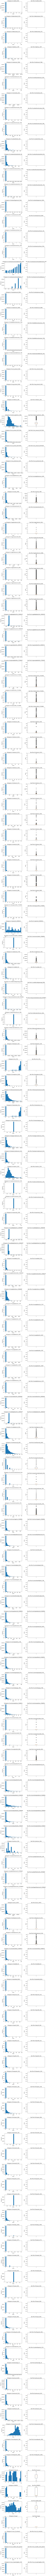

In [49]:
import matplotlib.pyplot as plt

cols = numerical_cols

fig, axs = plt.subplots(len(cols), 2, figsize=(9, 3 * len(cols)))

for i in range(len(cols)):
    col = cols[i]
    
    axs[i, 0].hist(df_train[col].to_numpy(), bins=20)
    axs[i, 0].set_title(f'Histogram of {col}')
    axs[i, 0].set_xlabel('Value')
    axs[i, 0].set_ylabel('Frequency')

    axs[i, 1].boxplot(df_train[col].to_numpy())
    axs[i, 1].set_title(f'Box Plot of {col}')
    axs[i, 1].set_ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Plot categorical values

In [50]:
categorical_cols

['date_decision',
 'classificationofcontr_13M',
 'classificationofcontr_400M',
 'contractst_545M',
 'contractst_964M',
 'dateofcredend_289D',
 'dateofcredstart_739D',
 'financialinstitution_382M',
 'financialinstitution_591M',
 'lastupdate_1112D',
 'overdueamountmax2_398A',
 'overdueamountmax2date_1002D',
 'overdueamountmax2date_1142D',
 'overdueamountmax_35A',
 'overdueamountmaxdatemonth_284T',
 'overdueamountmaxdateyear_994T',
 'purposeofcred_426M',
 'purposeofcred_874M',
 'subjectrole_182M',
 'subjectrole_93M',
 'collater_valueofguarantee_1124L',
 'pmts_dpd_1073P',
 'pmts_overdue_1140A',
 'min_pmts_year_1139T',
 'max_pmts_year_1139T',
 'collater_typofvalofguarant_298M',
 'collaterals_typeofguarante_669M',
 'subjectroles_name_838M',
 'first_opening_date',
 'last_opening_date',
 'contractenddate_991D',
 'min_openingdate_313D',
 'birth_259D',
 'contaddr_district_15M',
 'education_927M',
 'empl_employedfrom_271D',
 'empl_industry_691L',
 'empladdr_district_926M',
 'familystate_447L',
 '

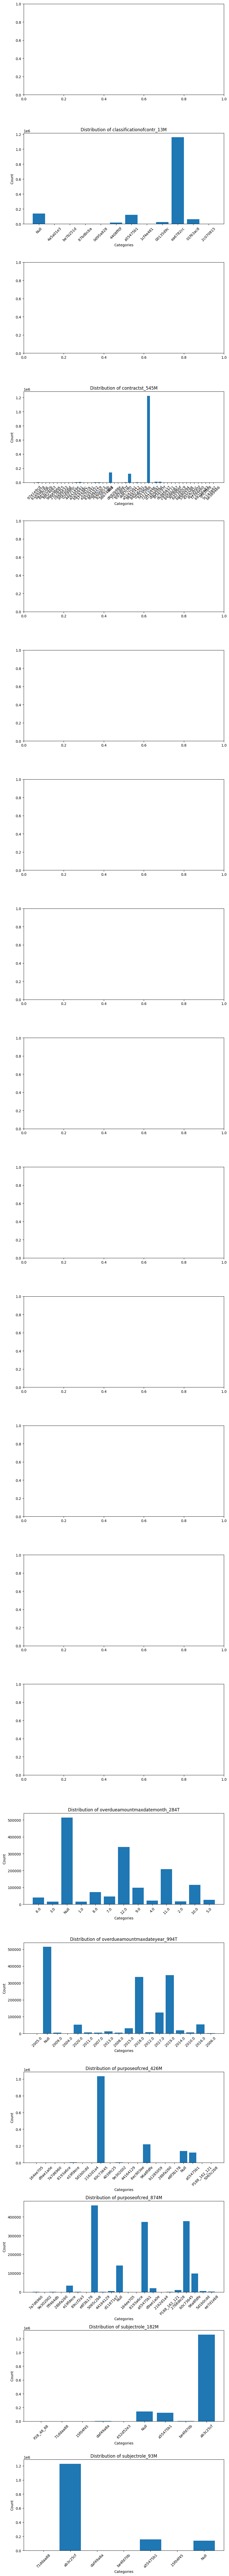

In [51]:
CAT_MAX = 100
values_with_many_categories = {}

cols = categorical_cols[:20]

fig, axs = plt.subplots(len(cols), 1, figsize=(9, 5 * len(cols)))

for i in range(len(cols)):
    col = cols[i]
    num_of_unique = df_train[col].unique().count()
    
    if num_of_unique > CAT_MAX:
        values_with_many_categories[col] = num_of_unique
    else:    
        filtered_col = df_train[col].fill_null('Null').value_counts()
        category_counts = filtered_col['count'].to_numpy()
        categories = filtered_col[col].to_numpy()

        axs[i].bar(categories, category_counts)
        axs[i].set_title(f'Distribution of {col}')
        axs[i].set_xlabel('Categories')
        axs[i].set_ylabel('Count')
        axs[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [52]:
df_train.head()

shape: (5, 306)
┌─────────┬────────────┬────────┬──────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ case_id ┆ date_decis ┆ MONTH  ┆ WEEK_NUM ┆ … ┆ riskassesm ┆ riskassesm ┆ secondquar ┆ thirdquart │
│ ---     ┆ ion        ┆ ---    ┆ ---      ┆   ┆ ent_302T   ┆ ent_940T   ┆ ter_766L   ┆ er_1082L   │
│ i64     ┆ ---        ┆ i64    ┆ i64      ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│         ┆ str        ┆        ┆          ┆   ┆ str        ┆ f64        ┆ f64        ┆ f64        │
╞═════════╪════════════╪════════╪══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 0       ┆ 2019-01-03 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 1       ┆ 2019-01-03 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 2       ┆ 2019-01-04 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 3       ┆ 2019-01-03 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ 4       ┆ 2019-01-04 ┆ 201901 ┆ 0        ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
└─────────┴────────────┴────────┴──────────┴───┴────────────┴────────────┴────────────┴────────────┘

In [53]:
month_target = df_train.group_by('MONTH').agg(
    avg_target=pl.col('target').mean()
).sort('MONTH')
month_target = month_target.with_columns(
    pl.col('MONTH').cast(pl.Utf8).str.to_datetime("%Y%m")
)
month_target

shape: (22, 2)
┌─────────────────────┬────────────┐
│ MONTH               ┆ avg_target │
│ ---                 ┆ ---        │
│ datetime[μs]        ┆ f64        │
╞═════════════════════╪════════════╡
│ 2019-01-01 00:00:00 ┆ 0.02599    │
│ 2019-02-01 00:00:00 ┆ 0.027385   │
│ 2019-03-01 00:00:00 ┆ 0.026755   │
│ 2019-04-01 00:00:00 ┆ 0.029453   │
│ 2019-05-01 00:00:00 ┆ 0.033006   │
│ …                   ┆ …          │
│ 2020-06-01 00:00:00 ┆ 0.024542   │
│ 2020-07-01 00:00:00 ┆ 0.022828   │
│ 2020-08-01 00:00:00 ┆ 0.019555   │
│ 2020-09-01 00:00:00 ┆ 0.021517   │
│ 2020-10-01 00:00:00 ┆ 0.021997   │
└─────────────────────┴────────────┘

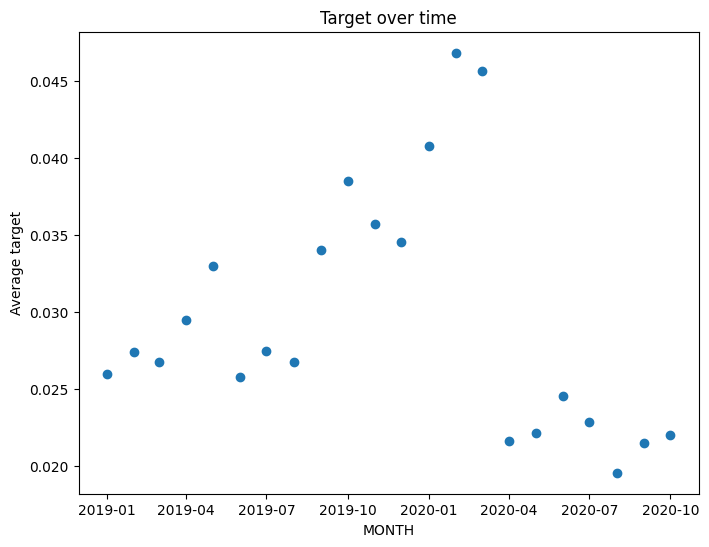

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(month_target['MONTH'], month_target['avg_target'])
plt.title('Target over time')
plt.xlabel('MONTH')
plt.ylabel('Average target')
plt.show()

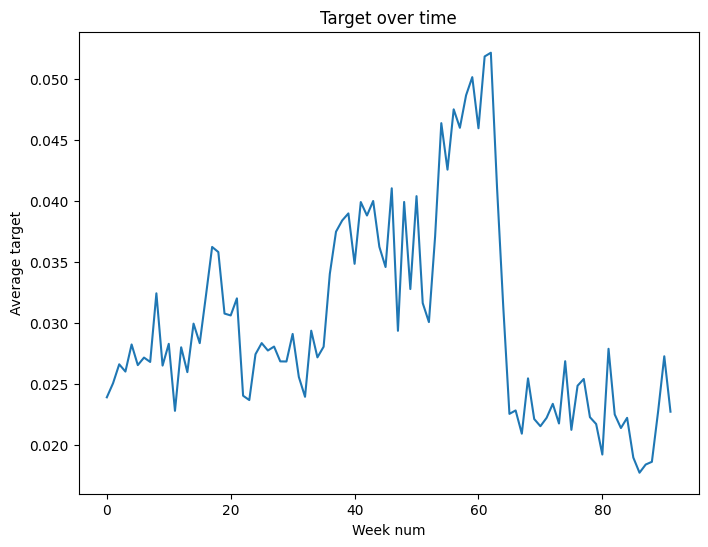

In [55]:
week_target = df_train.group_by('WEEK_NUM').agg(
    avg_target=pl.col('target').mean()
).sort('WEEK_NUM')

plt.figure(figsize=(8, 6))
plt.plot(week_target['WEEK_NUM'], week_target['avg_target'])
plt.title('Target over time')
plt.xlabel('Week num')
plt.ylabel('Average target')
plt.show()

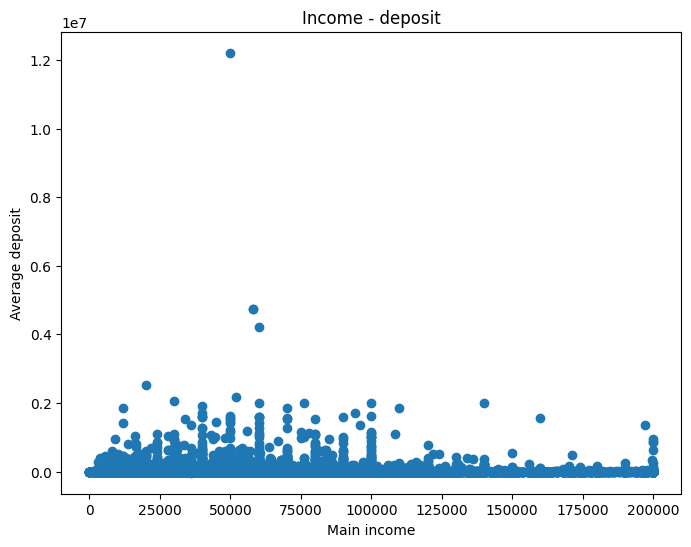

In [56]:
income_deposit = df_train[['maininc_215A', 'avg_amount_416A']].sort('maininc_215A')

plt.figure(figsize=(8, 6))
plt.scatter(income_deposit['maininc_215A'], income_deposit['avg_amount_416A'])
plt.title('Income - deposit')
plt.xlabel('Main income')
plt.ylabel('Average deposit')
plt.show()